# 一、数据准备

## 1.1 读取沪京深圳A股列表

In [71]:
import akshare as ak
import pandas as pd 
import numpy as np
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
A_STOCK_FILTER_START_STRING = ['600', '00', '603', '601', '605']

stock_zh_a_spot_em_df = ak.stock_zh_a_spot_em()
stock_zh_a_spot_em_df_filter = pd.concat([stock_zh_a_spot_em_df[stock_zh_a_spot_em_df.代码.str.startswith(start_str)] for start_str in A_STOCK_FILTER_START_STRING], axis=0)
stock_zh_a_spot_em_df_filter

,序号,代码,名称,最新价,涨跌幅,涨跌额,成交量,成交额,振幅,最高,...,量比,换手率,市盈率-动态,市净率,总市值,流通市值,涨速,5分钟涨跌,60日涨跌幅,年初至今涨跌幅
27,28,600636,国新文化,10.53,10.03,0.96,469212.0,4.813680e+08,10.87,10.53,...,1.09,10.65,49.96,1.77,4.637928e+09,4.637928e+09,0.00,0.00,38.74,-1.59
47,48,600536,中国软件,71.17,10.00,6.47,568142.0,3.841596e+09,11.61,71.17,...,1.55,8.84,-89.99,23.01,4.697178e+10,4.575744e+10,0.00,0.00,88.38,85.48
58,59,600882,妙可蓝多,30.04,10.00,2.73,121764.0,3.586751e+08,7.47,30.04,...,1.17,2.96,80.94,3.43,1.550290e+10,1.234877e+10,0.00,0.00,-6.71,-46.36
63,64,600586,金晶科技,9.03,9.99,0.82,1557338.0,1.387635e+09,9.62,9.03,...,4.51,10.90,23.31,2.37,1.290179e+10,1.290179e+10,0.00,0.00,-16.23,0.56
72,73,600429,三元股份,5.10,9.91,0.46,218396.0,1.101604e+08,9.27,5.10,...,6.76,1.46,53.85,1.56,7.738156e+09,7.637543e+09,0.00,0.00,2.82,-14.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5029,5030,605086,龙高股份,21.69,-3.00,-0.67,21401.0,4.682293e+07,4.20,22.47,...,1.71,4.18,24.85,2.55,2.776320e+09,1.109487e+09,0.00,0.28,14.82,-6.87
5067,5068,605589,圣泉集团,23.77,-3.33,-0.82,219834.0,5.314664e+08,5.69,24.90,...,0.63,3.57,29.22,2.23,1.860898e+10,1.462358e+10,0.08,-0.17,24.91,-37.61
5081,5082,605011,杭州热电,16.92,-3.48,-0.61,63582.0,1.085983e+08,3.37,17.49,...,0.88,5.25,30.71,3.40,6.769692e+09,2.049012e+09,0.00,-0.06,2.92,-18.97
5107,5108,605369,拱东医疗,108.22,-3.95,-4.45,6374.0,7.013354e+07,5.68,114.00,...,0.93,2.26,29.64,7.75,1.218851e+10,3.055878e+09,0.06,0.18,-17.34,-23.74


In [3]:
stock_zh_a_spot_em_df_filter.to_pickle('./data/stock_zh_a_spot_em_df_filter')

## 1.2 根据列表批量读取股票历史数据

In [47]:
%%time
# 接口示例-历史行情数据-前复权
import akshare as ak
import threading
import time
import os
import pandas as pd
START_DATE = "20220801"
END_DATE = "20221028"
HISTORY_DATA_PATH = './data/stock_history_df'

def pull_write_history_data():
     stock_zh_a_spot_em_df_filter = pd.read_pickle('./data/stock_zh_a_spot_em_df_filter')
     tmp = []
     def read_data(arg):
          stock_code = arg
          tmp_ele = ak.stock_zh_a_hist(symbol=stock_code, period="daily", start_date=START_DATE, end_date=END_DATE, adjust="qfq")
          tmp_ele['代码'] = stock_code
          tmp.append(tmp_ele)

     thread_lis = []
     for stock_code in stock_zh_a_spot_em_df_filter.代码:
          # read_data(str(stock_code),)
          print(stock_code)
          t = threading.Thread(target=read_data, args=(str(stock_code),))
          t.start()
          thread_lis.append(t)
          
          if len(thread_lis) >= 100:
               for t in thread_lis:
                    t.join()
               thread_lis.clear()
          
          
     stock_history_df = pd.concat(
          tmp,
          axis=0
     ) 

     stock_history_df.to_pickle(HISTORY_DATA_PATH)

if not os.path.exists(HISTORY_DATA_PATH):
     pull_write_history_data()

600419
600715
600996
600733
600405
600841
600151
600818
600757
600468
600218
600549
600600
600586
600570
600523
600227
600166
600161
600767
600766
600365
600303
600883
600167
600992
600995
600551
600926
600382
600077
600515
600795
600386
600909
600650
600499
600809
600416
600590
600816
600506
600153
600661
600593
600960
600860
600796
600836
600328
600769
600521
600599
600381
600258
600131
600373
600771
600875
600141
600129
600191
600279
600702
600512
600691
600066
600375
600888
600529
600531
600754
600400
600406
600609
600587
600114
600313
600517
600976
600277
600487
600389
600927
600021
600421
600573
600557
600096
600618
600717
600486
600458
600594
600195
600054
600965
600939
600706
600118
600636
600459
600640
600158
600027
600919
600229
600475
600620
600281
600391
600894
600596
600299
600865
600966
600825
600963
600848
600138
600106
600597
600354
600449
600821
600429
600300
600081
600775
600831
600807
600781
600543
600220
600662
600230
600379
600452
600201
600371
600436
600749
600993

# 二、读取数据、做特征工程

## 2.1 从文件中读取数据

In [8]:
from fileinput import close
import pandas as pd

# 股票标识列常量
COL_DATE = '日期'
COL_CODE = '代码'

# 基础指标列常量
COL_OPEN = '开盘'
COL_CLOSE = '收盘'
COL_HIGHEST = '最高'
COL_LOWESR = '最低'
COL_DEAL_MONEY = '成交额'
COL_DEAL_AMOUNT = '成交量'
COL_AMPLITUDE = '振幅'
COL_CAHNGE_RATE = '涨跌幅'
COL_CHANGE_NUM = '涨跌额'
COL_EXCHANGE_RATE = '换手率'
BASE_INDEX_COLS = [ 
    COL_OPEN
    ,COL_CLOSE
    ,COL_HIGHEST
    ,COL_LOWESR
    ,COL_DEAL_MONEY
    ,COL_DEAL_AMOUNT
    ,COL_AMPLITUDE
    ,COL_CAHNGE_RATE
    ,COL_CHANGE_NUM
    ,COL_EXCHANGE_RATE
    ]

# 计算指标列常量
COL_DAY_ORDER = 'day_order'
COL_HIGHEST_RATE = '最高振幅'
COL_LOWEST_RATE = '最低振幅'
COL_INDEX_RATE = 'A股大盘指数'
CACULATE_INDEX_COLS = [
    COL_DAY_ORDER
    ,COL_HIGHEST_RATE
    ,COL_LOWEST_RATE
    ,COL_INDEX_RATE
]


# 数据操作函数
def appendDayOrder(data, dateCol):
    """
    void函数,根据日期列排序,添加day_order列
    """
    data[COL_DAY_ORDER] = data[dateCol].rank(method='dense')
    return


In [9]:
stock_history_df = pd.read_pickle(HISTORY_DATA_PATH)
appendDayOrder(stock_history_df, COL_DATE)

pre_one_day_close = stock_history_df[COL_CLOSE] / (1 + stock_history_df[COL_CAHNGE_RATE]/100)
stock_history_df[COL_HIGHEST_RATE] = ( (stock_history_df[COL_HIGHEST] - pre_one_day_close) / pre_one_day_close ) * 100
stock_history_df[COL_LOWEST_RATE] = ( (stock_history_df[COL_LOWESR] - pre_one_day_close) / pre_one_day_close ) * 100
stock_history_df


,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,代码,day_order,最高振幅,最低振幅
0,2022-08-01,3.40,3.34,3.42,3.32,190788.0,63843045.0,2.94,-1.76,-0.06,1.42,600077,1.0,0.593054,-2.348263
1,2022-08-02,3.32,3.16,3.33,3.09,319060.0,101198831.0,7.19,-5.39,-0.18,2.38,600077,2.0,-0.300222,-7.485791
2,2022-08-03,3.12,3.10,3.23,3.08,279931.0,87789300.0,4.75,-1.90,-0.06,2.09,600077,3.0,2.213871,-2.532903
3,2022-08-04,3.11,3.28,3.38,3.11,374865.0,120866707.0,8.71,5.81,0.18,2.80,600077,4.0,9.035915,0.325945
4,2022-08-05,3.29,3.35,3.35,3.25,250740.0,82681809.0,3.05,2.13,0.07,1.87,600077,5.0,2.130000,-0.918657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,2022-10-24,13.33,13.01,13.34,12.93,5408.0,7111295.0,3.10,-1.66,-0.22,1.15,605155,55.0,0.834404,-2.264704
55,2022-10-25,12.85,12.89,13.13,12.66,5915.0,7595481.0,3.61,-0.92,-0.12,1.26,605155,56.0,0.924779,-2.687913
56,2022-10-26,12.93,13.13,13.22,12.88,5230.0,6832157.0,2.64,1.86,0.24,1.12,605155,57.0,2.558203,-0.079452
57,2022-10-27,13.13,13.22,13.36,13.12,4440.0,5871684.0,1.83,0.69,0.09,0.95,605155,58.0,1.756309,-0.071649


## 2.2 数据清洗

In [11]:
import StockConstant
# 1.去掉涨跌幅超过阈值的股票，即上新的股票
stock_history_df = stock_history_df[stock_history_df[StockConstant.COL_CAHNGE_RATE].between(-100, 100)]

In [27]:
stock_history_df[StockConstant.COL_DATE].min()

'2022-08-01'

## 2.3 特征工程

### 1. 历史（前3天）基础指标特征

In [70]:
# 1. 历史（前3天）基础指标特征
from datetime import datetime, timedelta

START_DATE_STRING = '2022-08-15'
END_DATE_OFFSET = 100

PRE_DAY_COLS = ['开盘','收盘','最高','最低','成交额','成交量','振幅','涨跌幅','涨跌额','换手率']
PRE_DAY_LEN = 10
PRE_DAY_COL_SUFFIX = '_pre_days'
PRE_DAY_SUFFIX = lambda i:f'_pre_{i}_day'

cur_date = datetime.strptime(START_DATE_STRING, '%Y-%m-%d')
date_strings = [datetime.strftime(cur_date + timedelta(days=i), '%Y-%m-%d') for i in range(END_DATE_OFFSET)]

merged_data = stock_history_df.copy()[stock_history_df.日期.isin(date_strings)]
print(len(merged_data))
# 1. 根据day_order字段进行left join，拼接前i天的相同字段
source_data = stock_history_df.copy()
for i in range(1, 1+PRE_DAY_LEN):
    right_on_col = f'pre_{i}_date'
    source_data[right_on_col] = source_data['day_order'] + i # on t2.day_order + i = t1.day_order

    merged_data = pd.merge(merged_data,
                           source_data[['代码', right_on_col] + PRE_DAY_COLS],
                           how='left',left_on=['代码', 'day_order'],
                           right_on=['代码',right_on_col],
                           suffixes=('',PRE_DAY_SUFFIX(i)))
    merged_data = merged_data.drop([right_on_col], axis=1)
    # merged_data = merged_data.drop([right_on_col + f'_pre_{i}_day'],axis=1)
    # print(merged_data.columns)

# 2.将相同字段的多个pre_day的列，拼接成一个列表
for col in PRE_DAY_COLS:
    pre_day_cols = [col+PRE_DAY_SUFFIX(i) for i in range(1, 1+PRE_DAY_LEN)]
    pre_day_cols.reverse()
    merged_data[col+PRE_DAY_COL_SUFFIX] = merged_data[pre_day_cols].values.tolist()
    merged_data = merged_data.drop(pre_day_cols, axis=1)

print(merged_data.columns)
stock_data_1 = merged_data
stock_data_1

152946
Index(['日期', '开盘', '收盘', '最高', '最低', '成交量', '成交额', '振幅', '涨跌幅', '涨跌额', '换手率',
       '代码', 'day_order', '最高振幅', '最低振幅', '开盘_pre_days', '收盘_pre_days',
       '最高_pre_days', '最低_pre_days', '成交额_pre_days', '成交量_pre_days',
       '振幅_pre_days', '涨跌幅_pre_days', '涨跌额_pre_days', '换手率_pre_days'],
      dtype='object')


,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,...,开盘_pre_days,收盘_pre_days,最高_pre_days,最低_pre_days,成交额_pre_days,成交量_pre_days,振幅_pre_days,涨跌幅_pre_days,涨跌额_pre_days,换手率_pre_days
0,2022-08-15,3.52,3.45,3.59,3.43,258728.0,90139526.0,4.56,-1.71,-0.06,...,"[3.4, 3.32, 3.12, 3.11, 3.29, 3.36, 3.4, 3.41,...","[3.34, 3.16, 3.1, 3.28, 3.35, 3.42, 3.44, 3.4,...","[3.42, 3.33, 3.23, 3.38, 3.35, 3.48, 3.49, 3.4...","[3.32, 3.09, 3.08, 3.11, 3.25, 3.33, 3.35, 3.3...","[63843045.0, 101198831.0, 87789300.0, 12086670...","[190788.0, 319060.0, 279931.0, 374865.0, 25074...","[2.94, 7.19, 4.75, 8.71, 3.05, 4.48, 4.09, 1.7...","[-1.76, -5.39, -1.9, 5.81, 2.13, 2.09, 0.58, -...","[-0.06, -0.18, -0.06, 0.18, 0.07, 0.07, 0.02, ...","[1.42, 2.38, 2.09, 2.8, 1.87, 2.15, 1.72, 1.37..."
1,2022-08-16,3.45,3.80,3.80,3.40,837178.0,307927443.0,11.59,10.14,0.35,...,"[3.32, 3.12, 3.11, 3.29, 3.36, 3.4, 3.41, 3.39...","[3.16, 3.1, 3.28, 3.35, 3.42, 3.44, 3.4, 3.45,...","[3.33, 3.23, 3.38, 3.35, 3.48, 3.49, 3.44, 3.4...","[3.09, 3.08, 3.11, 3.25, 3.33, 3.35, 3.38, 3.3...","[101198831.0, 87789300.0, 120866707.0, 8268180...","[319060.0, 279931.0, 374865.0, 250740.0, 28830...","[7.19, 4.75, 8.71, 3.05, 4.48, 4.09, 1.74, 2.3...","[-5.39, -1.9, 5.81, 2.13, 2.09, 0.58, -1.16, 1...","[-0.18, -0.06, 0.18, 0.07, 0.07, 0.02, -0.04, ...","[2.38, 2.09, 2.8, 1.87, 2.15, 1.72, 1.37, 1.86..."
2,2022-08-17,3.88,3.94,4.15,3.83,1590585.0,633843186.0,8.42,3.68,0.14,...,"[3.12, 3.11, 3.29, 3.36, 3.4, 3.41, 3.39, 3.44...","[3.1, 3.28, 3.35, 3.42, 3.44, 3.4, 3.45, 3.51,...","[3.23, 3.38, 3.35, 3.48, 3.49, 3.44, 3.46, 3.5...","[3.08, 3.11, 3.25, 3.33, 3.35, 3.38, 3.38, 3.4...","[87789300.0, 120866707.0, 82681809.0, 98584965...","[279931.0, 374865.0, 250740.0, 288307.0, 23048...","[4.75, 8.71, 3.05, 4.48, 4.09, 1.74, 2.35, 4.6...","[-1.9, 5.81, 2.13, 2.09, 0.58, -1.16, 1.47, 1....","[-0.06, 0.18, 0.07, 0.07, 0.02, -0.04, 0.05, 0...","[2.09, 2.8, 1.87, 2.15, 1.72, 1.37, 1.86, 2.27..."
3,2022-08-18,4.00,4.20,4.29,3.96,1615367.0,668487137.0,8.38,6.60,0.26,...,"[3.11, 3.29, 3.36, 3.4, 3.41, 3.39, 3.44, 3.52...","[3.28, 3.35, 3.42, 3.44, 3.4, 3.45, 3.51, 3.45...","[3.38, 3.35, 3.48, 3.49, 3.44, 3.46, 3.59, 3.5...","[3.11, 3.25, 3.33, 3.35, 3.38, 3.38, 3.43, 3.4...","[120866707.0, 82681809.0, 98584965.0, 78865561...","[374865.0, 250740.0, 288307.0, 230485.0, 18345...","[8.71, 3.05, 4.48, 4.09, 1.74, 2.35, 4.64, 4.5...","[5.81, 2.13, 2.09, 0.58, -1.16, 1.47, 1.74, -1...","[0.18, 0.07, 0.07, 0.02, -0.04, 0.05, 0.06, -0...","[2.8, 1.87, 2.15, 1.72, 1.37, 1.86, 2.27, 1.93..."
4,2022-08-19,3.78,3.78,3.90,3.78,1469990.0,559336308.0,2.86,-10.00,-0.42,...,"[3.29, 3.36, 3.4, 3.41, 3.39, 3.44, 3.52, 3.45...","[3.35, 3.42, 3.44, 3.4, 3.45, 3.51, 3.45, 3.8,...","[3.35, 3.48, 3.49, 3.44, 3.46, 3.59, 3.59, 3.8...","[3.25, 3.33, 3.35, 3.38, 3.38, 3.43, 3.43, 3.4...","[82681809.0, 98584965.0, 78865561.0, 62336596....","[250740.0, 288307.0, 230485.0, 183459.0, 24921...","[3.05, 4.48, 4.09, 1.74, 2.35, 4.64, 4.56, 11....","[2.13, 2.09, 0.58, -1.16, 1.47, 1.74, -1.71, 1...","[0.07, 0.07, 0.02, -0.04, 0.05, 0.06, -0.06, 0...","[1.87, 2.15, 1.72, 1.37, 1.86, 2.27, 1.93, 6.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152941,2022-10-24,13.33,13.01,13.34,12.93,5408.0,7111295.0,3.10,-1.66,-0.22,...,"[12.65, 12.3, 12.43, 12.77, 12.85, 13.06, 13.2...","[12.3, 12.48, 12.73, 12.81, 13.05, 13.2, 13.23...","[12.88, 12.48, 12.79, 12.93, 13.1, 13.22, 13.3...","[12.18, 12.13, 12.31, 12.7, 12.79, 12.9, 13.15...","[11355486.0, 7368669.0, 5137816.0, 5124197.0, ...","[9124.0, 5981.0, 4098.0, 3995.0, 5464.0, 6924....","[5.52, 2.85, 3.85, 1.81, 2.42, 2.45, 1.44, 2.2...","[-3.0, 1.46, 2.0, 0.63, 1.87, 1.15, 0.23, 0.3,...","[-0.38, 0.18, 0.25, 0.08, 0.24, 0.15, 0.03, 0....","[1.95, 1.28, 0.87, 0.85, 1.17, 1.48, 0.93, 1.1..."
152942,2022-10-25,12.85,12.89,13.13,12.66,5915.0,7595481.0,3.61,-0.92,-0.12,...,"[12.3, 12.43, 12.77, 12.85, 13.06, 13.25, 13.3...","[12.48, 12.73, 12.81, 13.05, 13.2, 13.23,

## 2.大盘指数特征

In [71]:
from operator import index
import akshare as ak

RIHGT_SUFFIX = '_r'

# 1. 获取大盘指数
def indexDiffRate(data, indexCol):
    """
    计算某个指标列相对昨天的变化率
    """
    RATE_SUFFIX = '_diff_rate'

    if COL_DAY_ORDER not in data.columns:
        raise RuntimeError('缺少 day order列，请先添加')
    
    leftCols = data.columns
    rightData = data.copy()
    rightOnCol = 'dayOrderMinsOne'
    rightData[rightOnCol] = data[COL_DAY_ORDER] + 1

    data = pd.merge(data, rightData, left_on=[COL_DAY_ORDER], right_on=[rightOnCol], suffixes=('',RIHGT_SUFFIX))
    data[indexCol+RATE_SUFFIX] = ((data[indexCol] - data[indexCol+RIHGT_SUFFIX]) / data[indexCol+RIHGT_SUFFIX] ) * 100

    selectCols = leftCols.tolist() + [indexCol+RATE_SUFFIX]
    data = data[selectCols]
    return data

stock_zh_index_daily_df = ak.stock_zh_index_daily(symbol="sh000002")
appendDayOrder(stock_zh_index_daily_df, 'date')
stock_zh_index_daily_df = indexDiffRate(stock_zh_index_daily_df, 'close')

stock_zh_index_daily_df
# 2. 拼接数据
def joinMarketIndex(data):
    leftCols = data.columns
    rightData = stock_zh_index_daily_df
    stock_zh_index_daily_df.date = stock_zh_index_daily_df.date.astype('str')
    
    data = pd.merge(data, rightData, left_on=[COL_DATE], right_on=['date'], suffixes=('', RIHGT_SUFFIX))
    
    selectCols = leftCols.tolist() + ['close_diff_rate']
    data = data[selectCols]
    data = data.rename({'close_diff_rate':COL_INDEX_RATE}, axis=1)
    return data

stock_data_2 = joinMarketIndex(stock_data_1)
stock_data_2

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,...,收盘_pre_days,最高_pre_days,最低_pre_days,成交额_pre_days,成交量_pre_days,振幅_pre_days,涨跌幅_pre_days,涨跌额_pre_days,换手率_pre_days,A股大盘指数
0,2022-08-15,3.52,3.45,3.59,3.43,258728.0,90139526.0,4.56,-1.71,-0.06,...,"[3.34, 3.16, 3.1, 3.28, 3.35, 3.42, 3.44, 3.4,...","[3.42, 3.33, 3.23, 3.38, 3.35, 3.48, 3.49, 3.4...","[3.32, 3.09, 3.08, 3.11, 3.25, 3.33, 3.35, 3.3...","[63843045.0, 101198831.0, 87789300.0, 12086670...","[190788.0, 319060.0, 279931.0, 374865.0, 25074...","[2.94, 7.19, 4.75, 8.71, 3.05, 4.48, 4.09, 1.7...","[-1.76, -5.39, -1.9, 5.81, 2.13, 2.09, 0.58, -...","[-0.06, -0.18, -0.06, 0.18, 0.07, 0.07, 0.02, ...","[1.42, 2.38, 2.09, 2.8, 1.87, 2.15, 1.72, 1.37...",-0.020971
1,2022-08-15,20.23,21.07,21.39,19.84,59352.0,124188887.0,7.76,5.46,1.09,...,"[21.4, 19.9, 19.64, 20.62, 20.13, 20.24, 20.79...","[21.46, 21.4, 21.08, 20.72, 21.57, 20.63, 21.1...","[20.78, 19.74, 19.54, 19.63, 19.96, 19.78, 20....","[80886266.0, 144769767.0, 115525240.0, 9650841...","[38110.0, 71971.0, 56801.0, 47236.0, 56153.0, ...","[3.21, 7.76, 7.74, 5.55, 7.81, 4.22, 4.25, 3.8...","[0.99, -7.01, -1.31, 4.99, -2.38, 0.55, 2.72, ...","[0.21, -1.5, -0.26, 0.98, -0.49, 0.11, 0.55, -...","[1.6, 3.02, 2.39, 1.99, 2.36, 1.22, 1.3, 1.25,...",-0.020971
2,2022-08-15,33.40,32.70,33.46,32.49,65879.0,281233322.0,2.92,-1.65,-0.55,...,"[32.42, 31.53, 31.54, 31.78, 34.13, 33.71, 33....","[32.54, 32.14, 32.22, 32.57, 34.38, 34.36, 33....","[31.69, 30.79, 31.42, 31.58, 31.92, 33.45, 32....","[380747622.0, 417140145.0, 365928602.0, 280500...","[90814.0, 101842.0, 88286.0, 67423.0, 187165.0...","[2.61, 4.16, 2.54, 3.14, 7.74, 2.67, 3.03, 3.5...","[-0.49, -2.75, 0.03, 0.76, 7.39, -1.23, -1.99,...","[-0.16, -0.89, 0.01, 0.24, 2.35, -0.42, -0.67,...","[0.62, 0.7, 0.6, 0.46, 1.28, 0.57, 0.55, 0.6, ...",-0.020971
3,2022-08-15,4.85,5.09,5.23,4.84,291533.0,148113557.0,7.96,3.88,0.19,...,"[5.05, 4.84, 4.78, 4.95, 5.04, 4.99, 5.0, 5.13...","[5.12, 5.1, 4.96, 5.04, 5.1, 5.04, 5.04, 5.5, ...","[4.77, 4.77, 4.73, 4.76, 4.75, 4.88, 4.94, 4.9...","[147991159.0, 121817284.0, 83088057.0, 9234482...","[297737.0, 247952.0, 171244.0, 188634.0, 31450...","[7.25, 6.53, 4.75, 5.86, 7.07, 3.17, 2.0, 11.4...","[4.55, -4.16, -1.24, 3.56, 1.82, -0.99, 0.2, 2...","[0.22, -0.21, -0.06, 0.17, 0.09, -0.05, 0.01, ...","[2.74, 2.28, 1.57, 1.73, 2.89, 1.72, 1.52, 5.0...",-0.020971
4,2022-08-15,7.59,7.59,7.62,7.44,59113.0,44617310.0,2.38,0.26,0.02,...,"[7.55, 7.32, 7.45, 7.46, 7.49, 7.39, 7.4, 7.44...","[7.57, 7.5, 7.68, 7.54, 7.52, 7.49, 7.44, 7.47...","[7.36, 7.22, 7.25, 7.33, 7.36, 7.29, 7.35, 7.3...","[35789673.0, 49772499.0, 59267846.0, 37154463....","[47803.0, 68145.0, 79042.0, 49952.0, 42773.0, ...","[2.82, 3.71, 5.87, 2.82, 2.14, 2.67, 1.22, 1.6...","[1.48, -3.05, 1.78, 0.13, 0.4, -1.34, 0.14, 0....","[0.11, -0.23, 0.13, 0.01, 0.03, -0.1, 0.01, 0....","[0.21, 0.3, 0.35, 0.22, 0.19, 0.22, 0.16, 0.24...",-0.020971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152941,2022-10-28,19.03,18.57,19.48,18.48,56967.0,107755341.0,5.22,-2.98,-0.57,...,"[16.77, 16.56, 16.68, 16.95, 17.77, 18.18, 18....","[16.94, 16.88, 17.28, 17.14, 18.65, 18.56, 19....","[16.53, 16.38, 16.56, 16.58, 17.66, 17.6, 18.4...","[64381889.0, 56666847.0, 59282577.0, 46611906....","[38466.0, 34216.0, 35373.0, 27535.0, 127200.0,...","[2.45, 2.98, 4.35, 3.36, 5.84, 5.4, 7.32, 4.93...","[0.18, -1.25, 0.72, 1.62, 4.84, 2.31, 3.8, 1.2...","[0.03, -0.21, 0.12, 0.27, 0.82, 0.41, 0.69, 0....","[5.0, 4.45, 4.6, 3.58, 16.54, 10.78, 14.05, 8....",-2.247448
152942,2022-10-28,24.62,23.94,24.76,23.70,10168.0,24565416.0,4.30,-2.84,-0.70,...,"[22.86, 23.76, 23.6, 24.0, 24.33, 23.8, 23.65,...","[22.96, 23.86, 23.77, 24.3, 24.53, 24.5, 24.36...","[22.15, 22.57, 23.16, 23.36, 23.2, 23.7, 23.5,...","[32429950.0, 40281270.0, 25604273.0, 37895290....","[14328.0, 17144.0, 10915.0, 15905.0, 18620.0, ...","[3.62, 5.64, 2.57, 3.98, 5.54, 3.29, 3.61, 4.9...","[2.1, 3.94, -0.67, 1.69, 1.38, -2.1

In [173]:
view(stock_data_2.iloc[:10,:])

In [158]:
# 2. 散户特征
import akshare as ak


stock_comment_detail_scrd_desire_em_df = pd.concat(
     [ak.stock_comment_detail_scrd_desire_em(symbol=stock_code) for stock_code in stock_zh_a_spot_em_df_filter.代码],
     axis=0
) 
stock_comment_detail_scrd_desire_em_df

KeyboardInterrupt: 

# 三、数据分析

In [14]:
# 分析
# 基本配置
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = (12, 6)
import warnings
warnings.filterwarnings("ignore")
print("Setup Complete")
# 主题配置
# sns.set_theme(style="whitegrid")
from IPython import display
display.set_matplotlib_formats('svg')
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

def view(data):
    FILE_PATH = 'view_tmp.xlsx'
    # pd.DataFrame.to_excel()
    data.to_excel(FILE_PATH, header=data.columns)
    return

Setup Complete


## 3.1 连续两天下跌股票涨跌幅分析

In [ ]:
stock_data_1[stock_data_1.涨跌幅_pre_1_day<0][stock_data_1.涨跌幅_pre_2_day<0]['涨跌幅'].count(),\
stock_data_1[stock_data_1.涨跌幅_pre_1_day<0][stock_data_1.涨跌幅_pre_2_day<0]['涨跌幅'].mean()

(2916, -0.3716152263374486)

In [ ]:
stock_data_1[stock_data_1.涨跌幅_pre_1_day<0][stock_data_1.涨跌幅_pre_2_day>0]['涨跌幅'].count(),\
stock_data_1[stock_data_1.涨跌幅_pre_1_day<0][stock_data_1.涨跌幅_pre_2_day>0]['涨跌幅'].mean()

(2542, -1.131369000786782)

In [ ]:
stock_data_1.涨跌幅.mean()

-0.9698524853019774

In [ ]:
stock_data_1[stock_data_1.涨跌幅_pre_1_day>0][stock_data_1.涨跌幅_pre_2_day<0]['涨跌幅'].count(),\
stock_data_1[stock_data_1.涨跌幅_pre_1_day>0][stock_data_1.涨跌幅_pre_2_day<0]['涨跌幅'].mean()

(2153, -1.1919136089177893)

In [ ]:
stock_data_1[stock_data_1.涨跌幅_pre_1_day<0]['涨跌幅'].count(),\
stock_data_1[stock_data_1.涨跌幅_pre_1_day<0]['涨跌幅'].mean()

(5636, -0.7194073811213627)

In [ ]:
two_days_down_stock = stock_data_1[stock_data_1.涨跌幅_pre_1_day<0]\
[stock_data_1.涨跌幅_pre_2_day<0]

In [ ]:
stock_data_1[stock_data_1.涨跌幅_pre_1_day<0][stock_data_1.涨跌幅_pre_2_day<0].to_excel('view_tmp.xlsx')

In [ ]:
two_days_down_stock = stock_data_1[stock_data_1.涨跌幅_pre_1_day<0][stock_data_1.涨跌幅_pre_2_day<0]

<AxesSubplot:xlabel='down_in_two_days', ylabel='涨跌幅'>

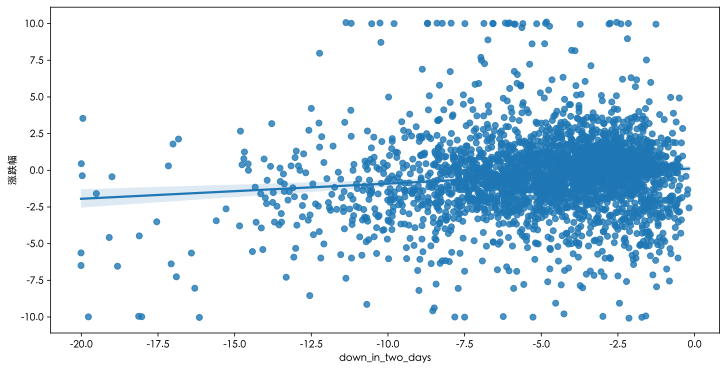

In [ ]:
two_days_down_stock['down_in_two_days'] = two_days_down_stock.涨跌幅_pre_1_day + two_days_down_stock.涨跌幅_pre_2_day

sns.regplot(data=two_days_down_stock, x='down_in_two_days', y='涨跌幅')

## 3.2 连续两天不同下跌区间分析

In [ ]:
two_days_down_stock['down_in_two_days_bin'] = pd.cut(x=two_days_down_stock['down_in_two_days'], bins=[-20 + i*2 for i in range(11)])

<AxesSubplot:xlabel='down_in_two_days_bin'>

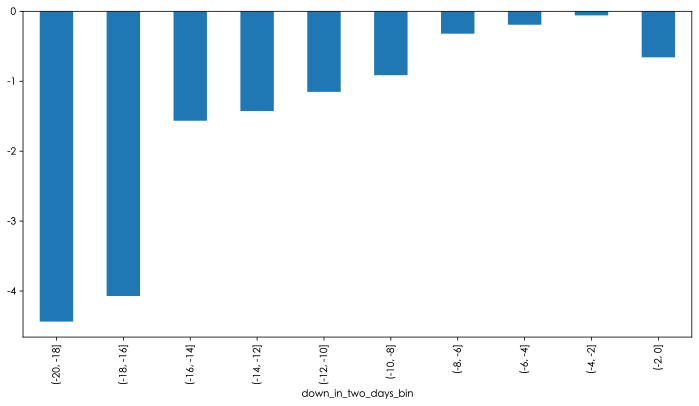

In [ ]:
two_days_down_stock.groupby(by='down_in_two_days_bin')['涨跌幅'].mean().plot(kind='bar')

<AxesSubplot:xlabel='down_in_two_days_bin'>

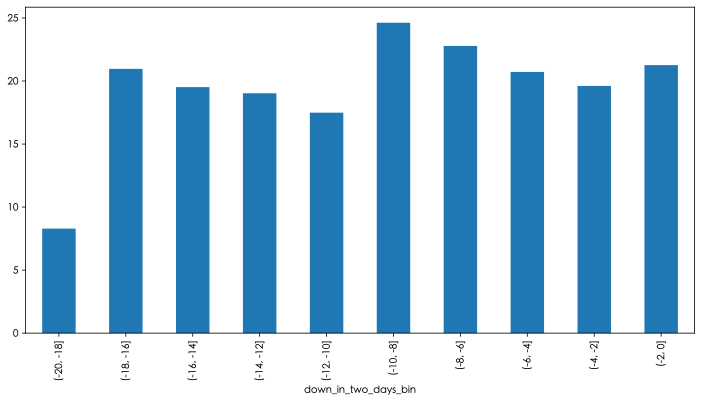

In [ ]:
two_days_down_stock.groupby(by='down_in_two_days_bin')['最高'].mean().plot(kind='bar')


In [ ]:
list(two_days_down_stock['down_in_two_days_bin'].unique())

[Interval(-2.0, 0.0, closed='right'),
 Interval(-8.0, -6.0, closed='right'),
 Interval(-4.0, -2.0, closed='right'),
 Interval(-6.0, -4.0, closed='right'),
 Interval(-14.0, -12.0, closed='right'),
 Interval(-12.0, -10.0, closed='right'),
 Interval(-10.0, -8.0, closed='right'),
 Interval(-16.0, -14.0, closed='right'),
 Interval(-20.0, -18.0, closed='right'),
 Interval(-18.0, -16.0, closed='right'),
 nan]

## 3.3 大涨股票动量分析

In [55]:
stock_data_2.to_excel('view_tmp.xlsx')

最高振幅均值2.4381718332515274 1422
涨跌幅均值-0.23974683544303796 1422


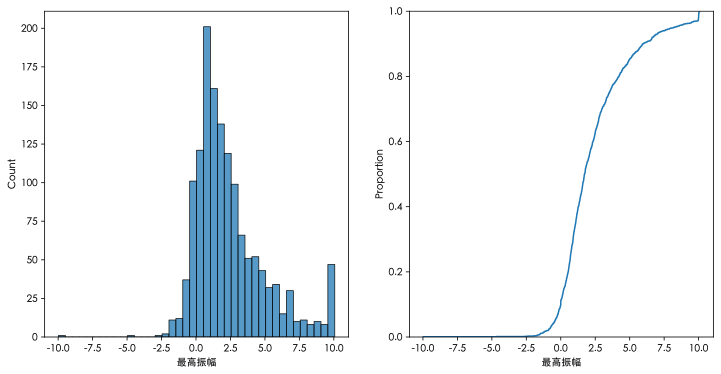

In [189]:
import StockConstant
# 1.过滤出前一天大涨的股票
preDayChange = StockConstant.COL_CAHNGE_RATE + PRE_DAY_COL_SUFFIX
highMomentonStock = stock_data_2[stock_data_2[preDayChange].map(lambda x:x[-1])>=6][stock_data_2[preDayChange].map(lambda x:x[-1])<8]
# 2.绘制次日最高加的百分比分布和累积分布
def analysisHighestRate(data):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    sns.histplot(data=data, x=StockConstant.COL_HIGHEST_RATE, ax=axs[0])
    sns.ecdfplot(data=data, x=StockConstant.COL_HIGHEST_RATE, ax=axs[1]) 
    # 3.计算均值
    print(f"最高振幅均值{data[StockConstant.COL_HIGHEST_RATE].mean()}", data[StockConstant.COL_HIGHEST_RATE].count())
    print(f"涨跌幅均值{data[StockConstant.COL_CAHNGE_RATE].mean()}", data[StockConstant.COL_HIGHEST_RATE].count())
analysisHighestRate(highMomentonStock)

最高振幅均值1.9025894986880165 156057
涨跌幅均值-0.19431034814202502 156057


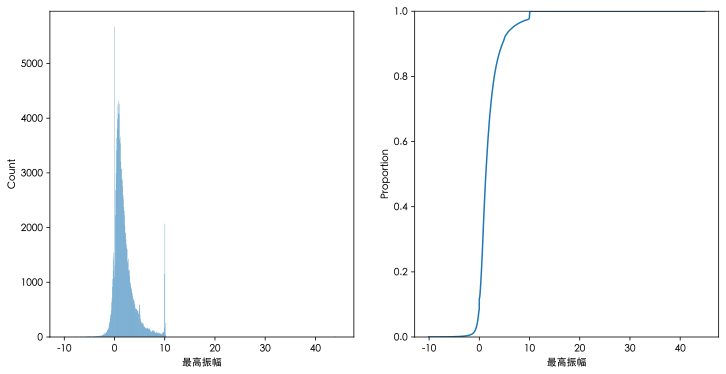

In [190]:
analysisHighestRate(stock_data_2)

In [235]:
# 期望收益
class StockTester():
    def __init__(self, stockData) -> None:
        self.stockData = stockData
        pass

    def testMomentenWayProfit(self, tomorrowSellRate):
        condition = self.stockData[StockConstant.COL_HIGHEST_RATE] >= tomorrowSellRate
        sucessSellStocks, failSellStocks = self.stockData[condition], self.stockData[~condition]
        sucessSellProp, failSellProp = len(sucessSellStocks) / len(self.stockData), len(failSellStocks) / len(self.stockData)
        sucessSellProfit, failSellProfit = tomorrowSellRate, failSellStocks[StockConstant.COL_CAHNGE_RATE].mean()
        profitExpectValue = sucessSellProp * sucessSellProfit + failSellProp * failSellProfit
        print(f"卖出成功的概率为：{self.show(sucessSellProp)}，该情况收益率为：{tomorrowSellRate}%")
        print(f"卖出失败的概率为：{self.show(failSellProp)}，该情况收益率为：{failSellProfit}%")
        print(f"期望收益率为：{round(profitExpectValue, 2)}%", )
    
    def show(self, value):
        return f"{round(value*100, 2)}%"

tester = StockTester(highMomentonStock)
for i in range(0, 40, 1):
    sellRate = i / 5
    print(sellRate)
    tester.testMomentenWayProfit(sellRate) 

0.0
卖出成功的概率为：89.73%，该情况收益率为：0.0%
卖出失败的概率为：10.27%，该情况收益率为：-4.120753424657535%
期望收益率为：-0.42%
0.2
卖出成功的概率为：85.65%，该情况收益率为：0.2%
卖出失败的概率为：14.35%，该情况收益率为：-3.8785294117647062%
期望收益率为：-0.39%
0.4
卖出成功的概率为：82.63%，该情况收益率为：0.4%
卖出失败的概率为：17.37%，该情况收益率为：-3.6789068825910936%
期望收益率为：-0.31%
0.6
卖出成功的概率为：78.2%，该情况收益率为：0.6%
卖出失败的概率为：21.8%，该情况收益率为：-3.383032258064517%
期望收益率为：-0.27%
0.8
卖出成功的概率为：72.08%，该情况收益率为：0.8%
卖出失败的概率为：27.92%，该情况收益率为：-3.054962216624685%
期望收益率为：-0.28%
1.0
卖出成功的概率为：66.81%，该情况收益率为：1.0%
卖出失败的概率为：33.19%，该情况收益率为：-2.793072033898305%
期望收益率为：-0.26%
1.2
卖出成功的概率为：61.81%，该情况收益率为：1.2%
卖出失败的概率为：38.19%，该情况收益率为：-2.5905340699815835%
期望收益率为：-0.25%
1.4
卖出成功的概率为：57.67%，该情况收益率为：1.4%
卖出失败的概率为：42.33%，该情况收益率为：-2.441362126245847%
期望收益率为：-0.23%
1.6
卖出成功的概率为：52.95%，该情况收益率为：1.6%
卖出失败的概率为：47.05%，该情况收益率为：-2.2996711509715992%
期望收益率为：-0.23%
1.8
卖出成功的概率为：48.24%，该情况收益率为：1.8%
卖出失败的概率为：51.76%，该情况收益率为：-2.1414130434782606%
期望收益率为：-0.24%
2.0
卖出成功的概率为：45.5%，该情况收益率为：2.0%
卖出失败的概率为：54.5%，该情况收益率为：-2.0601290322580645%
期望收益率为：-0.2

In [133]:
view(stock_data_2[~stock_data_2[StockConstant.COL_CAHNGE_RATE].between(-11, 11)])

## 3.4 高动量股票优中选优

- 成交额
- 成交额异动
- 收盘前交易量
- 大盘指数
- 关注度最高的受到心理倾向影响应该最大，或者该股票前一天有能够很好激发心理倾向的曲线

- 连跌7、8天的股票，这种连续的下跌，会使得散户心态崩溃，从而大量抛售，这时主力则拉起来
- 

<AxesSubplot:xlabel='成交量_pre_days', ylabel='最高振幅'>

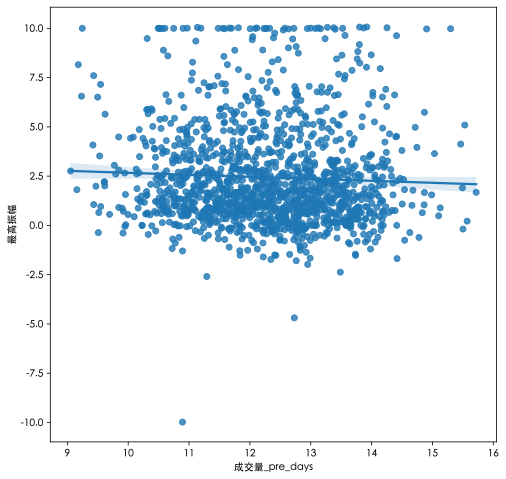

In [186]:
# 高动量股票(前一天大涨的股票)次日最高振幅比率 与 前一天成交额对数的关
plt.figure(figsize=(8, 8))
sns.regplot(x=np.log1p(highMomentonStock[StockConstant.COL_DEAL_AMOUNT+PRE_DAY_COL_SUFFIX].map(lambda x:x[-1])), y=highMomentonStock[StockConstant.COL_HIGHEST_RATE])

<AxesSubplot:xlabel='换手率_pre_days', ylabel='最高振幅'>

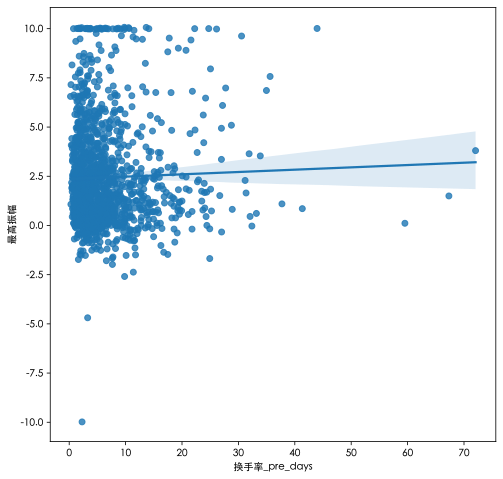

In [188]:
# 高动量股票(前一天大涨的股票)最高振幅比率 与 前1天换手率的关系
plt.figure(figsize=(8, 8))
sns.regplot(x=highMomentonStock[StockConstant.COL_EXCHANGE_RATE+PRE_DAY_COL_SUFFIX].map(lambda x:x[-1]), y=highMomentonStock[StockConstant.COL_HIGHEST_RATE])

In [185]:
view(highMomentonStock)

## 3.5 连续下跌股票分析

In [75]:
import math
def checkIfContinueDown(arr, continueDownDay):
    for i in range(continueDownDay):
        # float（"nan")判断，如果有，去除。有些数据没有8月15号前的数据（可能Start Date开早一点会有）
        if arr[-i-1]>0 or math.isnan(arr[-i-1]): return False
    return True

for continueDownDay in range(2, 10):
    continueDownStock = stock_data_2[stock_data_2[StockConstant.COL_CAHNGE_RATE+PRE_DAY_COL_SUFFIX].map(lambda x:checkIfContinueDown(x, continueDownDay))]
    print(continueDownDay, len(continueDownStock), continueDownStock[StockConstant.COL_CAHNGE_RATE].mean())
    print("The mean rate of all stock: ", stock_data_2[StockConstant.COL_CAHNGE_RATE].mean())
    view(continueDownStock.iloc[:1000, :])


2 47646 -0.1350356798052302
The mean rate of all stock:  -0.19865848077099107
3 25437 -0.03626685536816447
The mean rate of all stock:  -0.19865848077099107
4 13066 0.04624138986682991
The mean rate of all stock:  -0.19865848077099107
5 6347 0.004324877895068508
The mean rate of all stock:  -0.19865848077099107
6 3062 0.09849771391247547
The mean rate of all stock:  -0.19865848077099107
7 1433 0.3691695743196093
The mean rate of all stock:  -0.19865848077099107
8 593 0.25145025295109613
The mean rate of all stock:  -0.19865848077099107
9 222 0.46567567567567564
The mean rate of all stock:  -0.19865848077099107


In [73]:

math.isnan(stock_data_1[stock_data_1[StockConstant.COL_CODE]=="600345"][StockConstant.COL_CAHNGE_RATE+PRE_DAY_COL_SUFFIX].values.tolist()[0][0])

True